<a href="https://colab.research.google.com/github/GabrielFePL/Sugestao-de-Noticia-LSTM/blob/main/Estudo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural Recorrente para Predição de Notícias Sugeridas

## Base de Dados Histórica Simulada

### Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

### Função de Geração da Base de Dados e Registros

In [ ]:
def generate_simulated_data(num_users, num_access, num_subcategories, start_date):
  data = []
  for i in range(num_access):
    # Definição dos IDs do Registro
    user_id = random.randint(1, num_users)
    subcategory_id = random.randint(1, num_subcategories)

    # Definição da Hora do Registro
    timestamp = start_date + timedelta(minutes = random.randint(0, 1440))
    day_of_week = timestamp.weekday()
    hour_of_day = timestamp.hour

    # Adição do Registro Criado
    data.append([user_id, timestamp, subcategory_id, day_of_week, hour_of_day])

    # Atualização da Data Inicial para Próxima Iteração
    start_date = timestamp

  # Criação da Base de Dados
  columns = ['User_ID', 'Access_Timestamp', 'Subcategory_ID', 'Day_of_Week', 'Hour_of_Day']
  df = pd.DataFrame(data, columns = columns)

  return df

### Geração da Base de Dados

In [ ]:
# Definição da Simulação
num_users = 500
num_accesses = 30000
num_subcategories = 5
start_date = datetime(2023, 7, 24)

# Chamada da Função de Geração
simulated_data = generate_simulated_data(num_users, num_accesses, num_subcategories, start_date)

### Visualização da Base de Dados

In [ ]:
simulated_data

,User_ID,Access_Timestamp,Subcategory_ID,Day_of_Week,Hour_of_Day
0,454,2023-07-24 06:22:00,5,0,6
1,50,2023-07-24 15:56:00,5,0,15
2,288,2023-07-25 12:46:00,5,1,12
3,69,2023-07-25 14:51:00,3,1,14
4,42,2023-07-26 12:36:00,5,2,12
...,...,...,...,...,...
29995,45,2064-08-11 09:47:00,3,0,9
29996,220,2064-08-11 12:52:00,1,0,12
29997,106,2064-08-11 15:02:00,3,0,15
29998,469,2064-08-12 12:12:00,5,1,12


In [ ]:
simulated_data.describe()

,User_ID,Access_Timestamp,Subcategory_ID,Day_of_Week,Hour_of_Day
count,30000.000000,30000,30000.000000,30000.000000,30000.000000
mean,250.699133,2044-02-15 00:00:24.325999616,2.998933,2.998300,11.482633
min,1.000000,2023-07-24 06:22:00,1.000000,0.000000,0.000000
25%,125.000000,2033-12-06 06:07:30,2.000000,1.000000,6.000000
50%,251.000000,2044-02-09 07:16:00,3.000000,3.000000,11.000000
75%,376.000000,2054-05-10 08:59:45,4.000000,5.000000,17.000000
max,500.000000,2064-08-13 08:17:00,5.000000,6.000000,23.000000
std,144.472096,NaN,1.406982,1.999074,6.912107


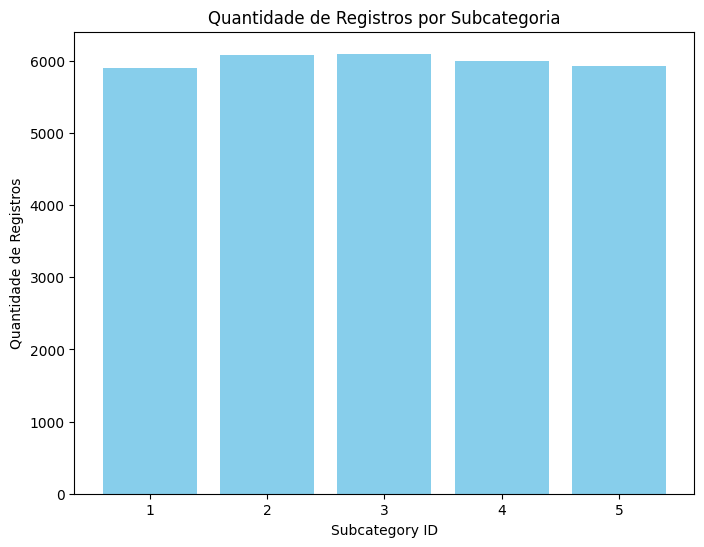

In [ ]:
subcategory_counts = simulated_data['Subcategory_ID'].value_counts()

plt.figure(figsize = (8, 6))
plt.bar(subcategory_counts.index, subcategory_counts.values, color = 'skyblue')
plt.xlabel('Subcategory ID')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Subcategoria')
plt.xticks(subcategory_counts.index)
plt.show()

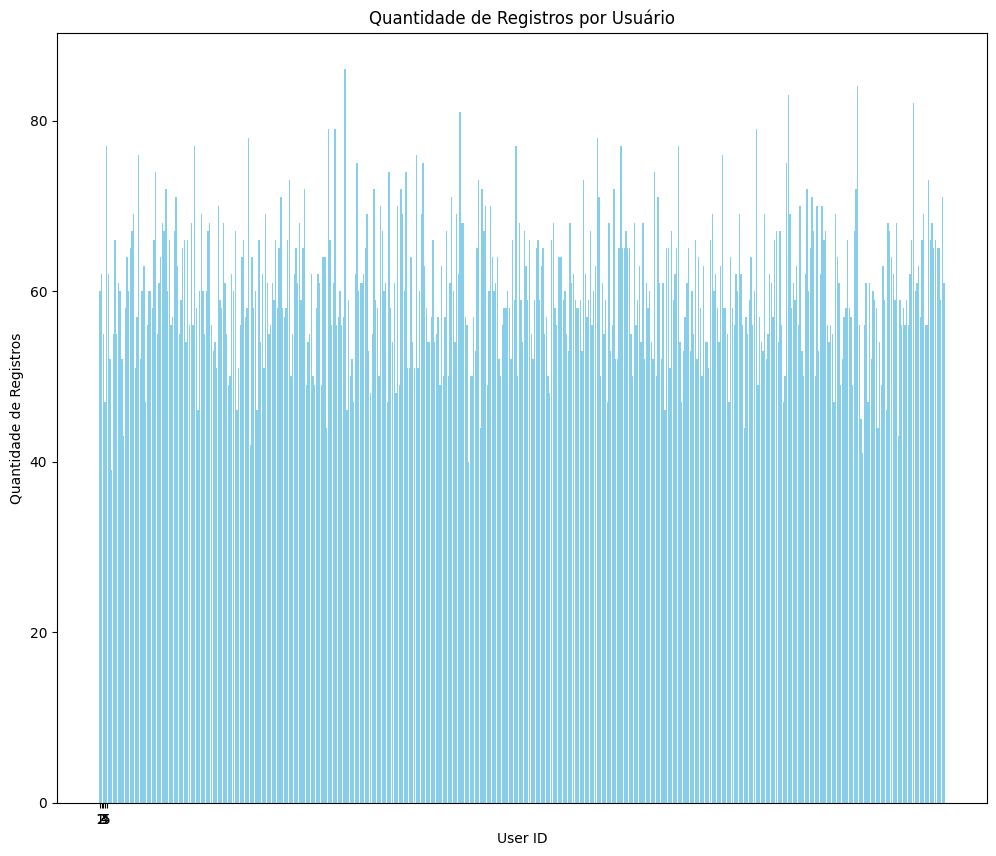

In [ ]:
user_id_counts = simulated_data['User_ID'].value_counts()

plt.figure(figsize = (12, 10))
plt.bar(user_id_counts.index, user_id_counts.values, color = 'skyblue')
plt.xlabel('User ID')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Usuário')
plt.xticks(subcategory_counts.index)
plt.show()

### Exportação da Base de Dados

In [ ]:
simulated_data.to_csv('simulated_data.csv', index = False)

## Tratamento da Base de Dados para Ingestão do Modelo

### Importação das Bibliotecas

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

!pip install tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
from google.colab import drive


### Conversão de Datas para Tipos Numéricos

## LSTM

### Importação das Bibliotecas

In [ ]:
!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Descrição dos Estudos

## Resumo do Estudo 01

Ao iniciar as pesquisas sobre o treinamento e a implementação de uma rede neural recorrente (RNN) para rastrear e prever os acessos de usuários às subcategorias de um portal de notícias, descobriu-se que o modelo LSTM é adequado para lidar com dados sequenciais e capturar dependências temporais em longas sequências de dados.
O Estudo 01 teve como intuito estabelecer uma base de dados fictícia adequada para o treinamento do modelo LSTM. Contudo, a base de dados gerada se mostrou ineficaz ao modelo, já que não representa os eventos temporais tão significativamente como deveria.

## Resumo do Estudo 02

Dada a ineficácia da base de dados simulada criada no Estudo 01, o objetivo do Estudo 02 foi gerar uma base de daos eficaz e balanceada para o treinamento do modelo LSTM. Neste Estudo, criou-se uma função para gerar registros aleatórios, porém, com alguma sequência temporal para representar o comportamento dos usuários de maneira generalista. Além de sessões dedicadas à visualização da base de dados para confirmação de sua eficácia.